# Dataset Analysis for AKKODIS

## Overview

The Akkodis Dataset consists of 40 columns, and 21,277 entries. Each candidate is identified by its ID and can appear in more than one entry, each entry is specific for an *Event_type__val*.

## Dataset Description

### Features
* *ID*: unique identifier for the candidate
* *Candidate State*: status of the candidate's application
  * Hired: the candidate has been selected
  * Vivier: the candidate will be taken in consideration for future opportunities
  * QM: could be 'Qualification Meeting'?
  * In selection: selection phase
  * First contact: the candidate has been contacted from the company for the first time
  * Economic proposal: the company has made a proposal to the candidate
  * Imported: the candidate has been transfered from another DB??
* *Age Range*: range of age for the candidate
  * < 20 years
  * 20 - 25 years
  * 26 - 30 years
  * 31 - 35 years
  * 36 - 40 years
  * 40 - 45 years
  * \> 45 years
* *Residence*: current place of residence for the candidate
* *Sex*: gender identification (Male|Female)
* *Protected Category*: indicates if the candidate falls into a protected category
  * Nothing
  * Article 1
  * Article 18
* *TAG*: keywords used by recruiter
* *Study Area*: Field of study or academic discipline
* *Study Title*: Academic degree or title obtained
  * Five-year degree
  * Doctorate
  * High school graduation
  * Three-year degree
  * master's degree
  * Professional qualification
  * Middle school diploma
* *Years Experience*: number of years of professional experience
  * 0
  * 0-1
  * 1-3
  * 3-5
  * 5-7
  * 7-10
  * +10
* *Sector*: industry or sector in which the candidate has experience
* *Last Role*: candidate's most recent job role
* *Year of Insertion*: year when the candidate's information was entered into out portal
* *Year of Recruitment*: year in which the candidate was hired
* *Recruitment Request*: represents the application request for a candidacy
* *Assumption Headquarters*: headquarters location associated with the hiring assumption
* *Job Family Hiring*: Job family or category for the hiring position
* *Job Title Hiring*: specific job title for the hiring position
* *Event_type__val*: It specifies the stage of the recruitment process for the candidate
* *Event_feedback*: feedback received from an event (OK|KO)
* *Linked_search_key*: keys indicate the number of searches conducted for a job position
* *Overall*: overall assessment, interview score
  * *1 - Low* or *~ 1 - Low*
  * *2 - Medium* or *~ 2 - Medium*
  * *3 - High* or *~ 3 - High*
  * *4 - Top* or *~ 4 - Top*
* *Job Description*: description of the job role
* *Candidate Profile*: ideal profile information for the candidate, requested by the company
* *Years Experience.1*: additional field for specifying years of experience
* *Minimum Ral* (Gross Annual Salary): minimum expected gross annual salary
* *Ral Maximum*: maximum expected gross annual salary
* *Study Level*: level of study, same values as *Study Title*
* *Study Area.1*: additional field for specifying the academic field of study
* *Akkodis headquarters*: headquarters location for Akkodis
* *Current Ral*: current or existing salary
* *Expected Ral*: expected salary
* *Technical Skills*: skills related to technical or specialized expertise from 1 to 4
* *Standing/Position*: standing or position within the organization from 1 to 4
* *Comunication*: communication skills from 1 to 4
* *Maturity*: level of maturity from 1 to 4
* *Dynamism*: level of Dynamism from 1 to 4
* *Mobility*: mobility from 1 to 4
* *English*: proficiency in the English language from 1 to 4



### Possible Target Variables
Some possible target variables in this dataset could be:
* **Suitability**: a new column that defines if a candidate is suitable for the position, based on the information provided.
* **Possible RAL**: a new column that predicts the adequate RAL for the candidate profile.

In [ ]:
#imports
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
dataset_path = 'Dataset_2.0_Akkodis.xlsx'

df = pd.read_excel(dataset_path)

In [71]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.title()

However the dataset contains very few samples with RAL values specified:

In [72]:
for col in df.columns:
  if 'Ral' in col:
    ral_null = df[col].isna().sum() / df.shape[0] * 100
    print(f'{ral_null:.2f}% of samples have no {col} specified')

94.53% of samples have no Minimum Ral specified
92.85% of samples have no Ral Maximum specified
80.56% of samples have no Current Ral specified
80.73% of samples have no Expected Ral specified


The **suitability** of a candidate can be obtained through `Candidate State` and `Event_Feedback`. However the 2 columns don't seem to be consistent:

In [73]:
filtered_df = df[df['Event_Feedback'].str.contains('KO', na=False)]
unique_values = filtered_df['Candidate State'].unique()

print(df[df['Event_Feedback'].str.contains('KO', na=False)][['Candidate State', 'Event_Type__Val', 'Event_Feedback']])

         Candidate State        Event_Type__Val              Event_Feedback
13                    QM  Qualification Meeting       KO (technical skills)
87                 Hired    Technical interview     KO (opportunity closed)
112                Hired    Technical interview  KO (proposed renunciation)
122    Economic proposal      Economic proposal  KO (proposed renunciation)
141         In selection           BM interview                KO (manager)
...                  ...                    ...                         ...
21281       In selection           HR interview       KO (technical skills)
21300  Economic proposal      Economic proposal  KO (proposed renunciation)
21315       In selection           HR interview                KO (manager)
21316       In selection           BM interview                KO (manager)
21336       In selection           HR interview                KO (retired)

[854 rows x 3 columns]


In [74]:
df.head()

,Id,Candidate State,Age Range,Residence,Sex,Protected Category,Tag,Study Area,Study Title,Years Experience,...,Akkodis Headquarters,Current Ral,Expected Ral,Technical Skills,Standing/Position,Comunication,Maturity,Dynamism,Mobility,English
0,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,2.0,2.0,1.0,2.0,2.0,3.0,3.0
4,71470,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data Cleaning
###Duplicates

Each candidate has more than one row in the dataset, one for each event. We need to select the most recent one. We can assume that the last row for a specific *ID* is the most recent one.

In [75]:
df_nodup = df.drop_duplicates(subset='Id', keep='last')

This however reduces drastically the number of samples in the dataset, from 21377 to 12263 rows. The 43% of the whole dataset  consists of duplicates, that if not removed can cause inconsistencies due to the different values of `Candidate State` and `Event_feedback`.

In [77]:
print(f"{100 - df_nodup.shape[0]/df.shape[0]*100:.2f}% of the dataset were duplicates")

42.63% of the dataset were duplicates


### Unuseful Columns

Some columns might be unuseful, too descriptive or redundant, such as `ID`, `TAG`, `Year Of Insertion`, `Years Experience.1` ...

In [78]:
columns_to_drop = ['Id', 'Last Role', 'Year Of Insertion',
                   'Year Of Recruitment', 'Assumption Headquarters',
                   'Linked_Search__Key', 'Years Experience.1',
                   'Akkodis Headquarters', 'Candidate Profile']

Some features are mostly not specified so filling with default values might not be useful. A **threshold** could be helpful to select the columns to drop.

In [79]:
for col in df.columns:
  null_count = df[col].isna().sum() / df.shape[0]
  print(f'{col} null count: {null_count*100:.2f}%')
  if null_count > 0.6 and col != 'Event_Feedback' and col != 'Protected Category':
    columns_to_drop.append(col)

Id null count: 0.00%
Candidate State null count: 0.00%
Age Range null count: 0.00%
Residence null count: 0.01%
Sex null count: 0.00%
Protected Category null count: 99.60%
Tag null count: 50.19%
Study Area null count: 0.21%
Study Title null count: 0.00%
Years Experience null count: 0.00%
Sector null count: 42.86%
Last Role null count: 42.86%
Year Of Insertion null count: 0.00%
Year Of Recruitment null count: 88.82%
Recruitment Request null count: 90.20%
Assumption Headquarters null count: 88.86%
Job Family Hiring null count: 88.86%
Job Title Hiring null count: 88.86%
Event_Type__Val null count: 7.44%
Event_Feedback null count: 72.65%
Linked_Search__Key null count: 70.41%
Overall null count: 72.01%
Job Description null count: 90.09%
Candidate Profile null count: 90.22%
Years Experience.1 null count: 90.08%
Minimum Ral null count: 94.53%
Ral Maximum null count: 92.85%
Study Level null count: 90.08%
Study Area.1 null count: 90.08%
Akkodis Headquarters null count: 90.08%
Current Ral null co

In [80]:
df = df_nodup.drop(columns=columns_to_drop)

In [81]:
print(f'The remaining columns are:\n\n\n')
df.head()

The remaining columns are:





,Candidate State,Age Range,Residence,Sex,Protected Category,Tag,Study Area,Study Title,Years Experience,Sector,Event_Type__Val,Event_Feedback
5,Hired,31 - 35 years,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,BM interview,OK
11,Vivier,40 - 45 years,CONVERSANO » Bari ~ Puglia,Female,NaN,"-, C, C++, DO178, LABVIEW, SOFTWARE DEVELOPMENT",computer engineering,Five-year degree,[7-10],Aeronautics,Candidate notification,NaN
13,QM,36 - 40 years,CASERTA » Caserta ~ Campania,Male,NaN,PROCESS ENG.,chemical engineering,Five-year degree,[3-5],Consulting,Qualification Meeting,KO (technical skills)
17,QM,> 45 years,SESTO SAN GIOVANNI » Milan ~ Lombardy,Male,NaN,"CISCO, NOC DAS SUPPORT, SOC",Legal,Five-year degree,[7-10],Telecom,Qualification Meeting,OK
25,In selection,31 - 35 years,MAZARA DEL VALLO » Trapani ~ Sicily,Male,NaN,"CALIBRATION, CAN, DYANALIZER, GT POWER, HIL, M...",Mechanical engineering,Five-year degree,[3-5],Automotive,BM interview,OK


### NaNs Handling
There are many columns with no values specified.

In [82]:
print(f'Columns that contain NaN values:\n {df.columns[df.isnull().any()].tolist()}')

Columns that contain NaN values:
 ['Residence', 'Protected Category', 'Tag', 'Study Area', 'Sector', 'Event_Type__Val', 'Event_Feedback']


In [83]:
for col in df.columns[df.isnull().any()].tolist():
  print(f'{col} values: {df[col].unique()} \n')

Residence values: ['TURIN » Turin ~ Piedmont' 'CONVERSANO » Bari ~ Puglia'
 'CASERTA » Caserta ~ Campania' ...
 'SAN FELICE A CANCELLO » Caserta ~ Campania'
 'PERDIFUMO » Salerno ~ Campania'
 'PALMANOVA » Udine ~ Friuli Venezia Giulia'] 

Protected Category values: [nan 'Article 1' 'Article 18'] 

Tag values: ['AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/VENUS, VHDL, FPGA'
 '-, C, C++, DO178, LABVIEW, SOFTWARE DEVELOPMENT' 'PROCESS ENG.' ...
 '-, SOLIDWORKS, NX, CREO, INENTOR, GT POWER, AMESIM' 'SQL, UNIX'
 '-, ENVIRONMENTAL QUALITY, ENVIRONMENTAL MANAGER, ENVIRONMENTAL PROJECT ENGINEER, ISO 14001, ENVIRONMENTAL MANAGEMENT , ISO 14001, ENVIRONMENTAL MANAGEMENT, OFFSHORE'] 

Study Area values: ['Automation/Mechatronics Engineering' 'computer engineering'
 'chemical engineering' 'Legal' 'Mechanical engineering'
 'Telecommunications Engineering' 'Economic - Statistics'
 'Materials Science and Engineering' 'Other scientific subjects'
 'Biomedical Engineering' 'electronic Engineering'
 'I

Some default values should be defined to replace NaN:

In [84]:
df['Residence'] = df['Residence'].fillna('Not Specified')
df['Residence'] = df['Residence'].replace('', 'Not Specified')

df['Protected Category'] = df['Protected Category'].fillna('No')
df['Protected Category'] = df['Protected Category'].replace('Article 18', 'Yes')
df['Protected Category'] = df['Protected Category'].replace('Article 1', 'Yes')

df['Tag'] = df['Tag'].fillna('-')

df['Study Area'] = df['Study Area'].fillna('Not Specified')

df['Sector'] = df['Sector'].fillna('Not Specified')

df['Event_Type__Val'] = df['Event_Type__Val'].fillna('Not Specified')

df['Event_Feedback'] = df['Event_Feedback'].fillna('Not Specified')
df['Event_Feedback'] = df['Event_Feedback'].apply(lambda x: 'OK' if 'OK' in x else x)
df['Event_Feedback'] = df['Event_Feedback'].apply(lambda x: 'KO' if 'KO' in x else x)



### Feature Mapping
Feature mapping can be used to simplify the values in the dataset.

Let's analyze each feature:
*  **Candidate State**:
  

Text(0, 0.5, 'Frequency')

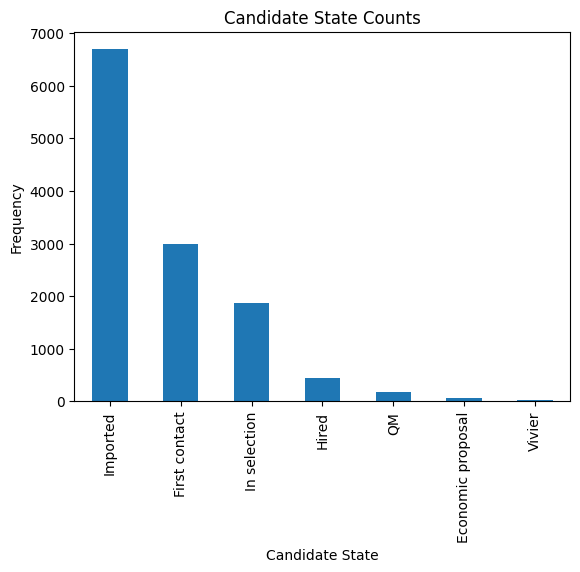

In [151]:
candidate_state_counts = df['Candidate State'].value_counts()
candidate_state_df = pd.DataFrame(candidate_state_counts.items(), columns=['Candidate State', 'Count'])
candidate_state_df.plot(x='Candidate State', y='Count', kind='bar', legend=False)
plt.title('Candidate State Counts')
plt.ylabel('Frequency')

* **Age Range**:

In [155]:
custom_order = ['< 20 years', '20 - 25 years', '26 - 30 years',
                '31 - 35 years', '36 - 40 years', '40 - 45 years', '> 45 years']
df['Age Range'] = pd.Categorical(df['Age Range'], categories=custom_order, ordered=True)

Text(0, 0.5, 'Frequency')

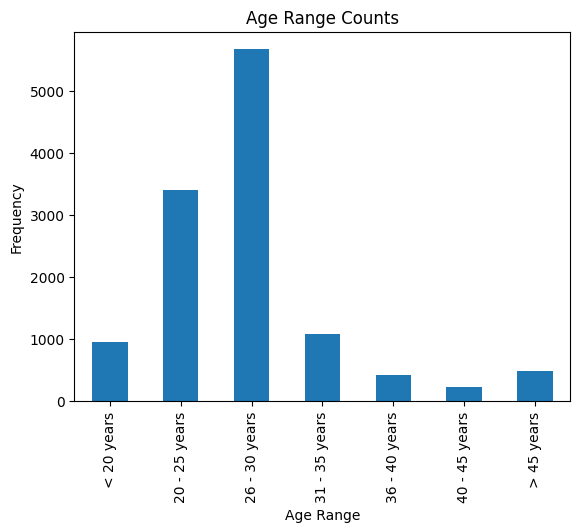

In [156]:
age_range_counts = Counter(df['Age Range'].sort_values())
age_range_df = pd.DataFrame(age_range_counts.items(), columns=['Age Range', 'Count'])
age_range_df.plot(x='Age Range', y='Count', kind='bar', legend=False)
plt.title('Age Range Counts')
plt.ylabel('Frequency')

* **Residence**: we can use mapping to simplify this feature

In [87]:
print(df['Residence'].unique())

['TURIN » Turin ~ Piedmont' 'CONVERSANO » Bari ~ Puglia'
 'CASERTA » Caserta ~ Campania' ...
 'SAN FELICE A CANCELLO » Caserta ~ Campania'
 'PERDIFUMO » Salerno ~ Campania'
 'PALMANOVA » Udine ~ Friuli Venezia Giulia']


In [88]:
#get the state list
residence_list = df['Residence'].unique()
state_list = [s for s in residence_list if ('(STATE)' in s) or ('(OVERSEAS)' in s) or ('ETHIOPIA' in s) or ('SOUTH AFRICAN REPUBLIC' in s) or ('USSR' in s) or ('YUGOSLAVIA' in s)]
state_list = [s.split(' » ')[0] for s in [s.split(' ~ ')[0] for s in state_list]]
state_list = sorted(set(state_list))
print(state_list)


['ALBANIA', 'ALGERIA', 'AUSTRIA', 'BELARUS', 'BELGIUM', 'BRAZIL', 'BULGARIA', 'CHILE', "CHINA PEOPLE'S REPUBLIC", 'COLOMBIA', 'CROATIA', 'CZECH REPUBLIC', 'EGYPT', 'ERITREA', 'FRANCE', 'GERMANY', 'GREAT BRITAIN-NORTHERN IRELAND', 'GREECE', 'GRENADA', 'HAITI', 'INDIA', 'INDONESIA', 'IRAN', 'ITALY', 'KUWAIT', 'LEBANON', 'LIBYA', 'LITHUANIA', 'MALAYSIA', 'MALTA', 'MEXICO', 'MONACO', 'MOROCCO', 'NETHERLANDS', 'NIGERIA', 'OMAN', 'PAKISTAN', 'PHILIPPINES', 'PORTUGAL', 'QATAR', 'REPUBLIC OF POLAND', 'ROMANIA', 'RUSSIAN FEDERATION', 'SAINT LUCIA', 'SAINT PIERRE ET MIQUELON (ISLANDS)', 'SAN MARINO', 'SERBIA AND MONTENEGRO', 'SINGAPORE', 'SLOVAKIA', 'SOUTH AFRICAN REPUBLIC', 'SPAIN', 'SRI LANKA', 'SWEDEN', 'SWITZERLAND', 'SYRIA', 'TONGA', 'TUNISIA', 'Türkiye', 'UKRAINE', 'UNITED ARAB EMIRATES', 'UNITED STATES OF AMERICA', 'USSR', 'UZBEKISTAN', 'VENEZUELA', 'YUGOSLAVIA']


In [89]:
#get the italian regions list
italy_list = [s for s in residence_list if ('(STATE)' not in s) and ('(OVERSEAS)' not in s) and ('ETHIOPIA' not in s) and ('SOUTH AFRICAN REPUBLIC' not in s) and ('USSR' not in s) and ('YUGOSLAVIA' not in s)]
italy_list = [s.split(' ~ ')[-1] for s in italy_list]
italy_list = sorted(set(italy_list))
print(italy_list)

['Abruzzo', 'Aosta Valley', 'Basilicata', 'Calabria', 'Campania', 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardy', 'Marche', 'Molise', 'Not Specified', 'Piedmont', 'Puglia', 'Sardinia', 'Sicily', 'Trentino Alto Adige', 'Tuscany', 'Umbria', 'Veneto']


In [90]:
def map_residence(value):
    for region in italy_list:
        if region in value:
          return region
    for state in state_list:
        if state in value:
          return state
    return 'Not Specified'


In [97]:
df['Residence'] = df['Residence'].apply(map_residence)
df['Residence'] = df['Residence'].replace('Türkiye', 'TURKEY')
df['Residence'] = df['Residence'].replace('USSR', 'RUSSIAN FEDERATION')

We can add 3 new columns to the dataset: `Residence State`, `Residence Italian Region`, `European Residence`. This kind of information needs to be protected but should also be analyzed in order to ensure *Fairness*.

In [100]:
df['Residence State'] = df['Residence'].apply(lambda x: x if x in state_list else 'ITALY')

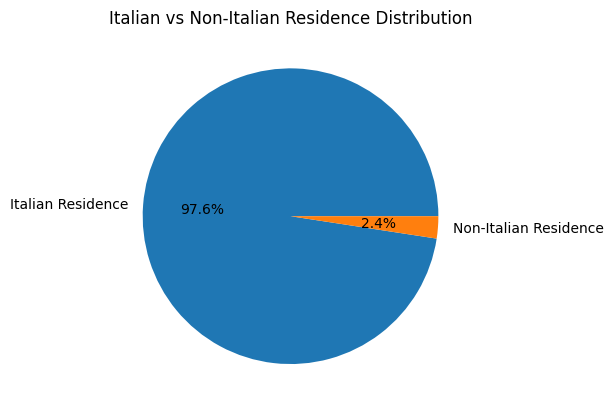

In [163]:
#italian vs non-italian residence distribution
distrib_it = [len(df[df['Residence State'] == 'ITALY']),
                df.shape[0]-len(df[df['Residence State'] == 'ITALY'])]
labels = ['Italian Residence', 'Non-Italian Residence']
plt.pie(distrib_it, labels=labels, autopct='%1.1f%%')
plt.title('Italian vs Non-Italian Residence Distribution')
plt.show()

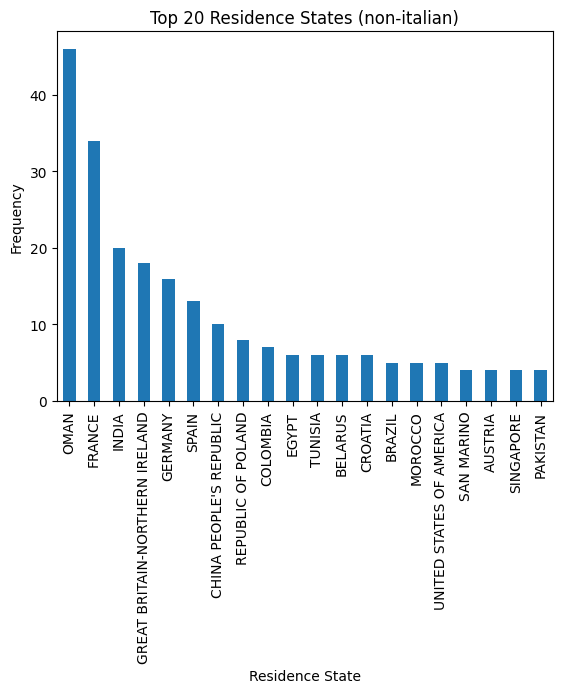

In [162]:
res_state_counts = Counter(df[df['Residence State'] != 'ITALY']['Residence State'])
res_state_df = pd.DataFrame(res_state_counts.items(), columns=['Residence State', 'Count'])
res_state_df = res_state_df.sort_values(by='Count', ascending=False)
res_state_df.head(20).plot(x='Residence State', y='Count', kind='bar', legend=False)
plt.title('Top 20 Residence States (non-italian)')
plt.ylabel('Frequency')
plt.show()

In [101]:
df['Residence Italian Region'] = df['Residence'].apply(lambda x: x if x in italy_list else 'Not in ITALY')

In [107]:
df.loc[
    (df['Residence State'] == 'ITALY') & (df['Residence Italian Region'] == 'Not in ITALY'),
    'Residence Italian Region'
] = 'Not Specified'

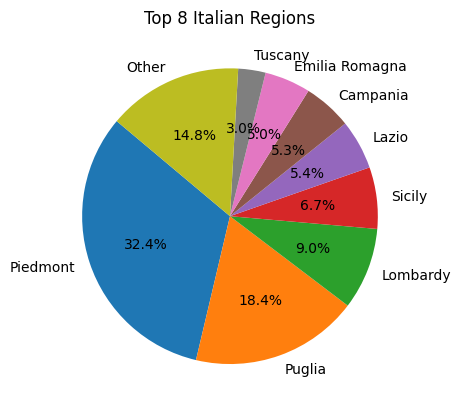

In [176]:
n_top = 8

filtered_df = df[df['Residence Italian Region'] != 'Not in ITALY']
reg_distrib = Counter(filtered_df['Residence Italian Region'])
reg_distrib_df = pd.DataFrame(reg_distrib.items(), columns=['Residence Italian Region', 'Count'])
reg_distrib_df = reg_distrib_df.sort_values(by='Count', ascending=False)

top = reg_distrib_df.iloc[:n_top]

other_sum = reg_distrib_df.iloc[n_top:]['Count'].sum()
top= pd.concat([top, pd.DataFrame({'Residence Italian Region': ['Other'], 'Count': [other_sum]})])

# Plot the pie chart
labels = top['Residence Italian Region']
sizes = top['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {n_top} Italian Regions')
plt.show()


In [108]:
european_countries = [
    'ALBANIA', 'AUSTRIA', 'BELARUS', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CZECH REPUBLIC',
    'FRANCE', 'GERMANY', 'GREAT BRITAIN-NORTHERN IRELAND', 'GREECE', 'ITALY', 'LATVIA',
    'LITHUANIA', 'LUXEMBOURG', 'MALTA', 'MOLDOVA', 'MONACO', 'MONTENEGRO', 'NETHERLANDS',
    'NORWAY', 'POLAND', 'PORTUGAL', 'ROMANIA', 'RUSSIA', 'SAN MARINO', 'SERBIA', 'SLOVAKIA',
    'SLOVENIA', 'SPAIN', 'SWEDEN', 'SWITZERLAND', 'UKRAINE'
]
df['European Residence'] = df['Residence State'].apply(lambda x: 'Yes' if x in european_countries else 'No')

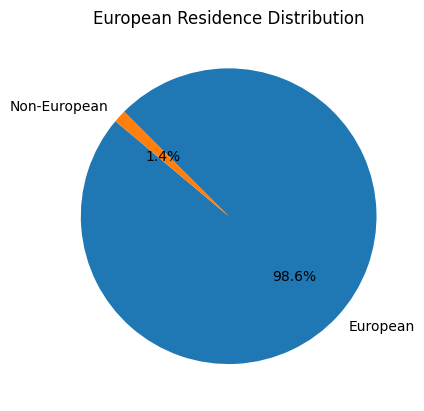

In [175]:
eu_distrib = Counter(df['European Residence'])
eu_distrib_df = pd.DataFrame(eu_distrib.items(), columns=['European Residence', 'Count'])

labels = eu_distrib_df['European Residence']
labels.replace({'Yes': 'European', 'No': 'Non-European'}, inplace=True)
sizes = eu_distrib_df['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('European Residence Distribution')
plt.show()

The `Residence` column can be removed.

In [110]:
df = df.drop(columns=['Residence'])

* **Sex**: the dataset is unbalanced with respect to the Sex feature, with 76.8% Male candidates and 23.2% female candidates.

([<matplotlib.patches.Wedge at 0x7fa8fc9fc460>,
 [Text(0.15654062369121927, -1.0888044053613875, 'Male'),
  Text(-0.15654057272060573, 1.0888044126895817, 'Female')],
 [Text(0.08538579474066504, -0.5938933120153022, '76.8%'),
  Text(-0.0853857669385122, 0.5938933160124991, '23.2%')])

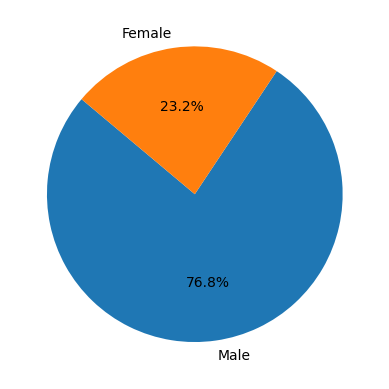

In [177]:
sex_distrib = Counter(df['Sex'])
sex_distrib_df = pd.DataFrame(sex_distrib.items(), columns=['Sex', 'Count'])

labels = sex_distrib_df['Sex']
sizes = sex_distrib_df['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

* **Protected Category**: the dataset is highly unbalanced with respect to the Protected Category feature, with only 0.4% candidates from protected categories.


([<matplotlib.patches.Wedge at 0x7fa8f9fef3d0>,
 [Text(0.8346254005063664, -0.7165196723256019, 'No Protected Category'),
  Text(-0.8346254188500342, 0.7165196509583008, 'Protected Category')],
 [Text(0.45525021845801794, -0.39082891217760096, '99.6%'),
  Text(-0.4552502284636549, 0.3908289005227095, '0.4%')])

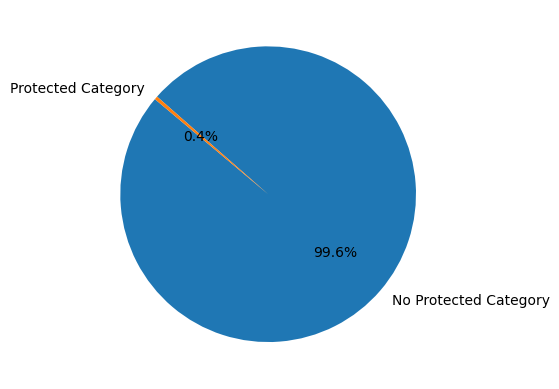

In [179]:
pr_cat_distrib = Counter(df['Protected Category'])
pr_cat_distrib_df = pd.DataFrame(pr_cat_distrib.items(), columns=['Protected Category', 'Count'])

labels = pr_cat_distrib_df['Protected Category']
labels.replace({'No': 'No Protected Category', 'Yes': 'Protected Category'}, inplace=True)
sizes = pr_cat_distrib_df['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

* **Tag**:

In [117]:
print(df['Tag'].unique())

['AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/VENUS, VHDL, FPGA'
 '-, C, C++, DO178, LABVIEW, SOFTWARE DEVELOPMENT' 'PROCESS ENG.' ...
 '-, SOLIDWORKS, NX, CREO, INENTOR, GT POWER, AMESIM' 'SQL, UNIX'
 '-, ENVIRONMENTAL QUALITY, ENVIRONMENTAL MANAGER, ENVIRONMENTAL PROJECT ENGINEER, ISO 14001, ENVIRONMENTAL MANAGEMENT , ISO 14001, ENVIRONMENTAL MANAGEMENT, OFFSHORE']


In [181]:
all_keywords = df['Tag'].str.split(', ').explode()
keyword_counts = Counter(all_keywords)

keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])
keyword_df.drop(keyword_df[keyword_df['Keyword'] == '-'].index, inplace=True)
keyword_df.drop(keyword_df[keyword_df['Keyword'] == '.'].index, inplace=True)
keyword_df.drop(keyword_df[keyword_df['Keyword'] == 'X'].index, inplace=True)
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

keyword_df.head(10)

,Keyword,Count
20,MATLAB,576
3,C++,312
2,C,305
21,SIMULINK,305
106,SOLIDWORKS,299
35,PYTHON,275
136,EXCEL,177
51,JAVA,176
135,OFFICE,143
204,AUTOCAD,129


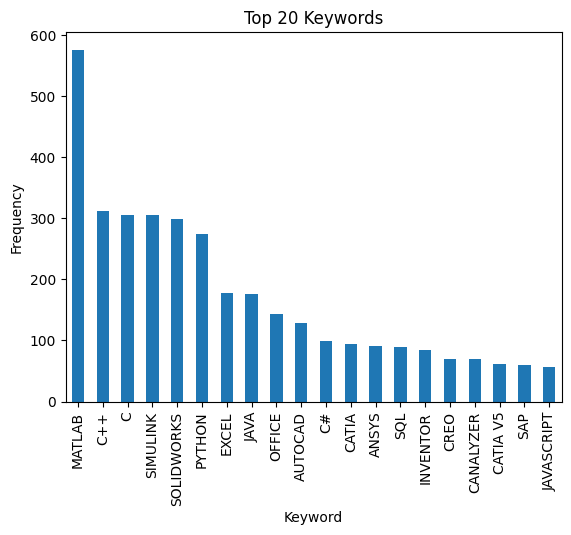

In [135]:
keyword_df.head(20).plot(x='Keyword', y='Count', kind='bar', legend=False)
plt.title('Top 20 Keywords')
plt.ylabel('Frequency')
plt.xlabel('Keyword')
plt.show()


* **Study Area**:

In [137]:
print(df['Study Area'].unique())

['Automation/Mechatronics Engineering' 'computer engineering'
 'chemical engineering' 'Legal' 'Mechanical engineering'
 'Telecommunications Engineering' 'Economic - Statistics'
 'Materials Science and Engineering' 'Other scientific subjects'
 'Biomedical Engineering' 'electronic Engineering'
 'Information Engineering'
 'Aeronautical/Aerospace/Astronautics Engineering'
 'Energy and Nuclear Engineering' 'Informatics' 'Management Engineering'
 'Automotive Engineering' 'industrial engineering' 'Other' 'Surveyor'
 'Electrical Engineering' 'Scientific maturity' 'Chemist - Pharmaceutical'
 'Political-Social' 'Other humanities subjects' 'Geo-Biological'
 'Civil/Civil and Environmental Engineering' 'Psychology' 'Linguistics'
 'Agriculture and veterinary' 'Literary' 'Humanistic high school diploma'
 'Accounting' 'Communication Sciences' 'Safety Engineering' 'Architecture'
 'Mathematics' 'construction Engineering' 'Petroleum Engineering'
 'Naval Engineering' 'Artistic' 'Not Specified'
 'Mathemati

In [180]:
study_areas_counts = Counter(df['Study Area'])

study_areas_counts_df = pd.DataFrame(study_areas_counts.items(), columns=['Study Area', 'Count'])
study_areas_counts_df = study_areas_counts_df.sort_values(by='Count', ascending=False)

study_areas_counts_df.head(10)

,Study Area,Count
4,Mechanical engineering,2235
1,computer engineering,1344
12,Aeronautical/Aerospace/Astronautics Engineering,951
9,Biomedical Engineering,924
17,industrial engineering,901
15,Management Engineering,798
10,electronic Engineering,685
18,Other,567
11,Information Engineering,485
0,Automation/Mechatronics Engineering,430


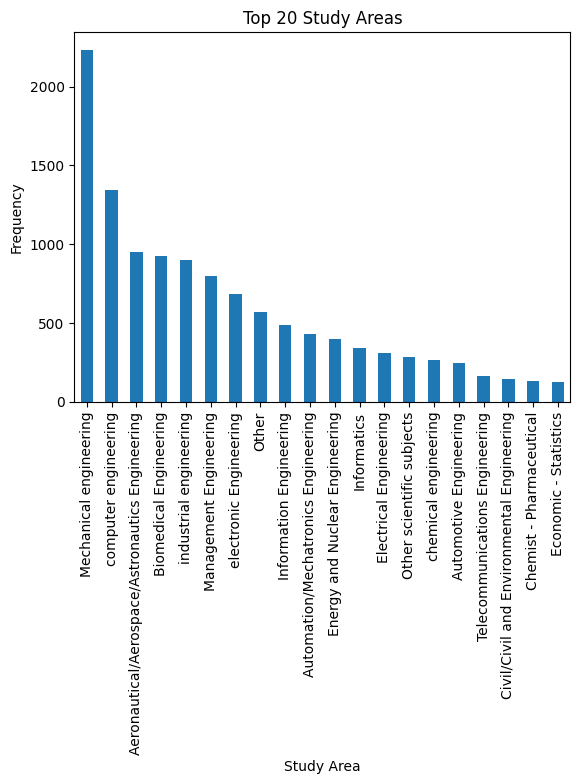

In [139]:
study_areas_counts_df.head(20).plot(x='Study Area', y='Count', kind='bar', legend=False)
plt.title('Top 20 Study Areas')
plt.ylabel('Frequency')
plt.xlabel('Study Area')
plt.show()

* **Study Title**:

<Axes: xlabel='Study Title'>

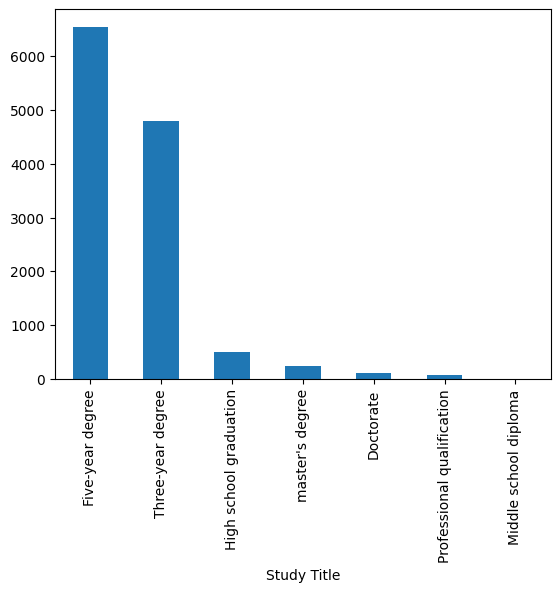

In [182]:
study_title_distrib = df['Study Title'].value_counts()
study_title_df = pd.DataFrame(study_title_distrib.items(), columns=['Study Title', 'Count'])
study_title_df.plot(x='Study Title', y='Count', kind='bar', legend=False)

* **Years Experience**:

In [141]:
print(df['Years Experience'].unique())

['[1-3]' '[7-10]' '[3-5]' '[5-7]' '[+10]' '[0]' '[0-1]']


Text(0, 0.5, 'Frequency')

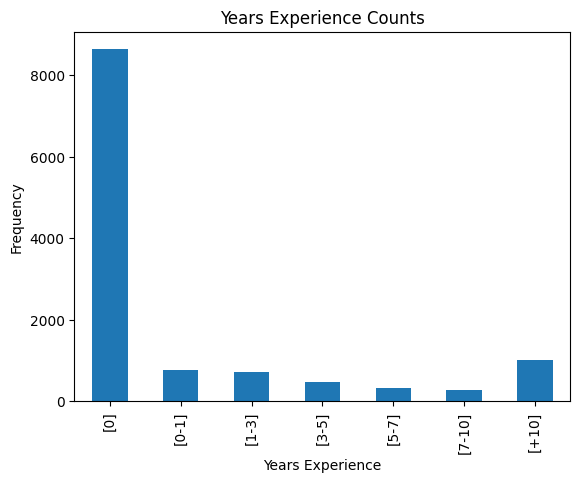

In [183]:
custom_order = ['[0]', '[0-1]', '[1-3]', '[3-5]', '[5-7]', '[7-10]', '[+10]']
df['Years Experience'] = pd.Categorical(df['Years Experience'], categories=custom_order, ordered=True)

years_exp_counts = Counter(df['Years Experience'].sort_values())
years_exp_df = pd.DataFrame(years_exp_counts.items(), columns=['Years Experience', 'Count'])
years_exp_df.plot(x='Years Experience', y='Count', kind='bar', legend=False)
plt.title('Years Experience Counts')
plt.ylabel('Frequency')

* **Sector**: this feature doesn't seem relevant as the most frequent values are "Not Specified" and "Others"

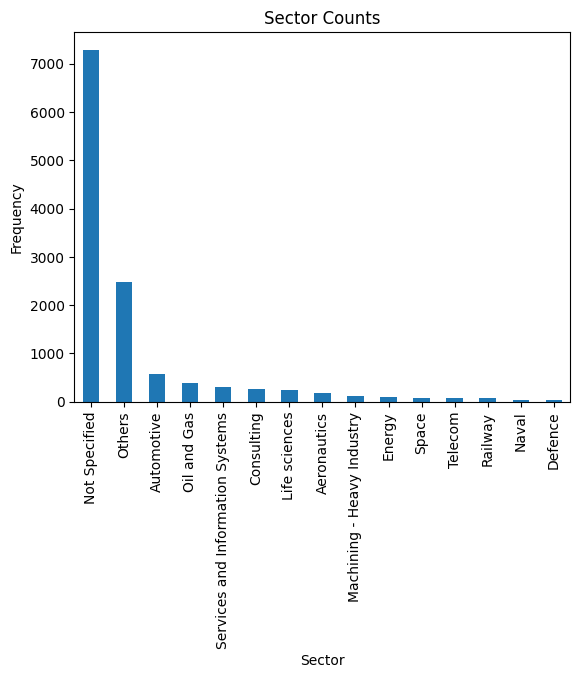

In [186]:
sector_counts = Counter(df['Sector'])
sector_df = pd.DataFrame(sector_counts.items(), columns=['Sector', 'Count'])
sector_df = sector_df.sort_values(by='Count', ascending=False)
sector_df.plot(x='Sector', y='Count', kind='bar', legend=False)
plt.title('Sector Counts')
plt.ylabel('Frequency')
plt.show()

* **Event_type__val**:

In [144]:
print(df['Event_Type__Val'].unique())

['BM interview' 'Candidate notification' 'Qualification Meeting'
 'Technical interview' 'HR interview' 'CV request' 'Contact note'
 'Inadequate CV' 'Economic proposal' 'Research association'
 'Sending SC to customer' 'Not Specified' 'Commercial note']


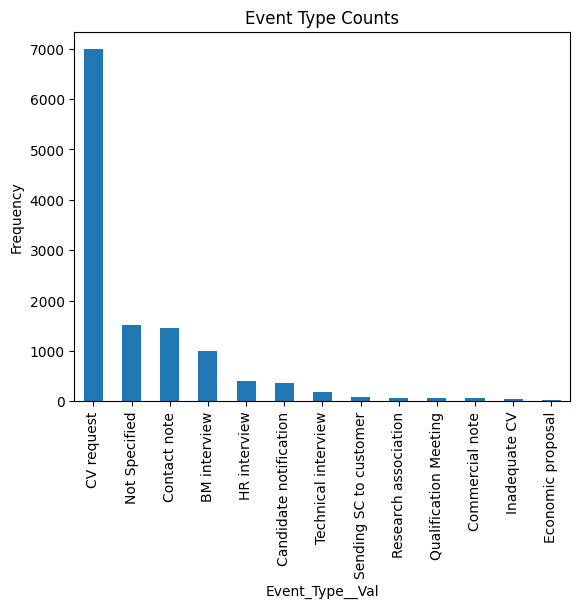

In [188]:
etv_distrib = Counter(df['Event_Type__Val'])
etv_distrib_df = pd.DataFrame(etv_distrib.items(), columns=['Event_Type__Val', 'Count'])
etv_distrib_df = etv_distrib_df.sort_values(by='Count', ascending=False)
etv_distrib_df.plot(x='Event_Type__Val', y='Count', kind='bar', legend=False)
plt.title('Event Type Counts')
plt.ylabel('Frequency')
plt.show()

* **Event_feedback**:

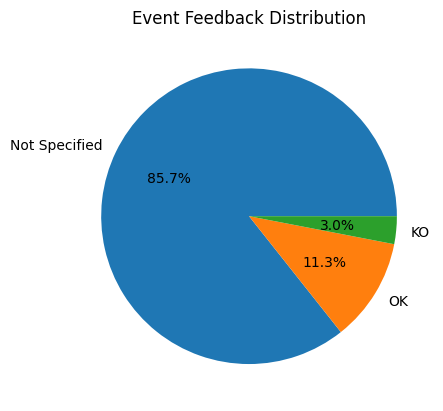

In [195]:
ok_ko_distrib = df['Event_Feedback'].value_counts()
ok_ko_distrib_df = pd.DataFrame(ok_ko_distrib.items(), columns=['Event_Feedback', 'Count'])

ok_ko_distrib = ok_ko_distrib_df['Count']
labels = ok_ko_distrib_df['Event_Feedback']

plt.pie(ok_ko_distrib, labels=labels, autopct='%1.1f%%')
plt.title('Event Feedback Distribution')
plt.show()

## Data Visualization
### Sex & Candidate State

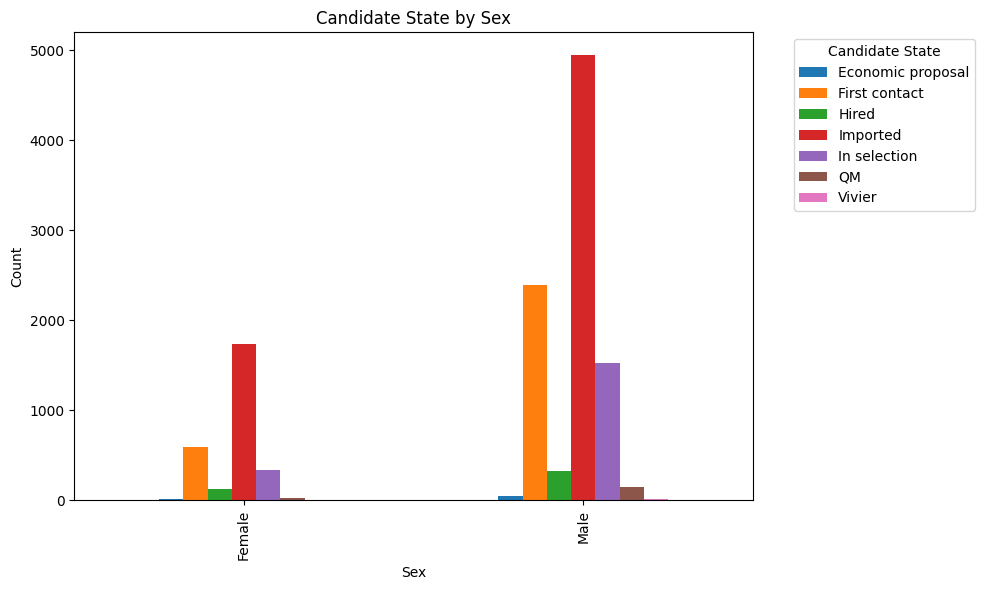

In [197]:
pivot = df.pivot_table(index='Sex', columns='Candidate State', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Candidate State by Sex')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.legend(title='Candidate State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


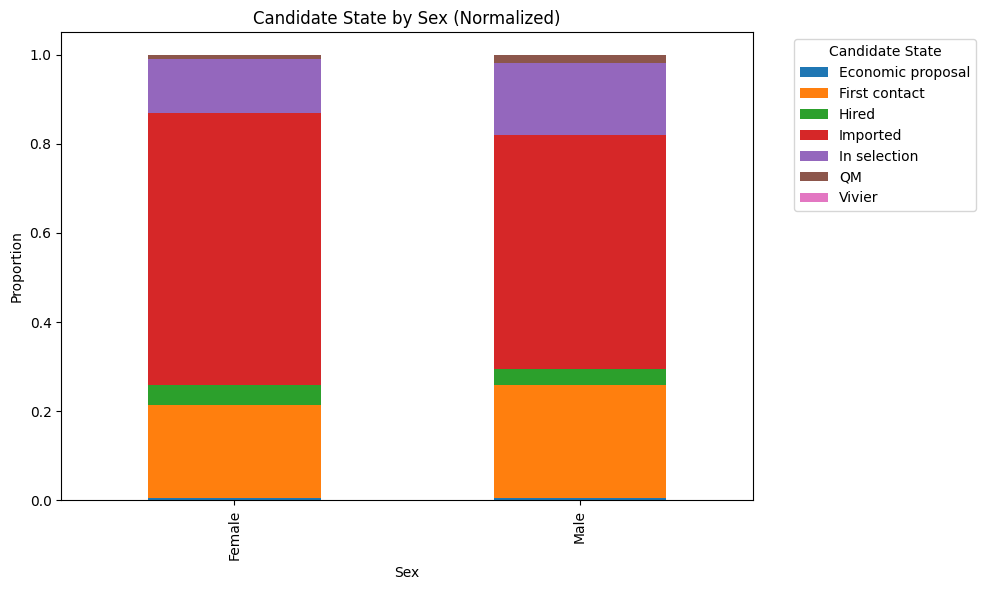

In [200]:
# Normalize pivot table to percentages
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0)

pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Candidate State by Sex (Normalized)')
plt.ylabel('Proportion')
plt.xlabel('Sex')
plt.legend(title='Candidate State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###Protected Category & Candidate State

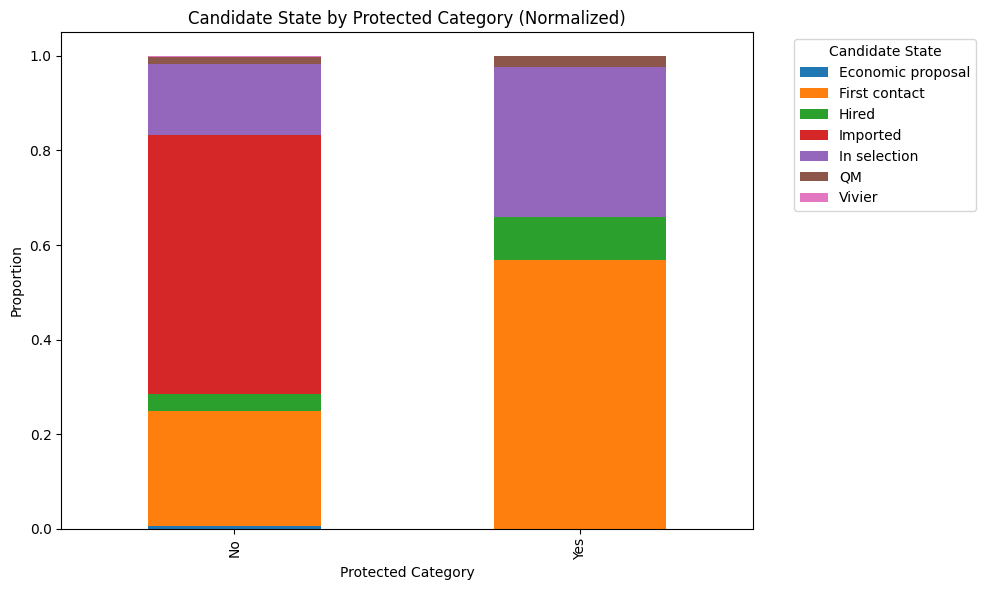

In [203]:
pivot = df.pivot_table(index='Protected Category', columns='Candidate State', aggfunc='size', fill_value=0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0)

pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Candidate State by Protected Category (Normalized)')
plt.ylabel('Proportion')
plt.xlabel('Protected Category')
plt.legend(title='Candidate State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [204]:
print(df.columns)

Index(['Candidate State', 'Age Range', 'Sex', 'Protected Category', 'Tag',
       'Study Area', 'Study Title', 'Years Experience', 'Sector',
       'Event_Type__Val', 'Event_Feedback', 'Residence State',
       'Residence Italian Region', 'European Residence'],
      dtype='object')


### Distribution of Age Ranges

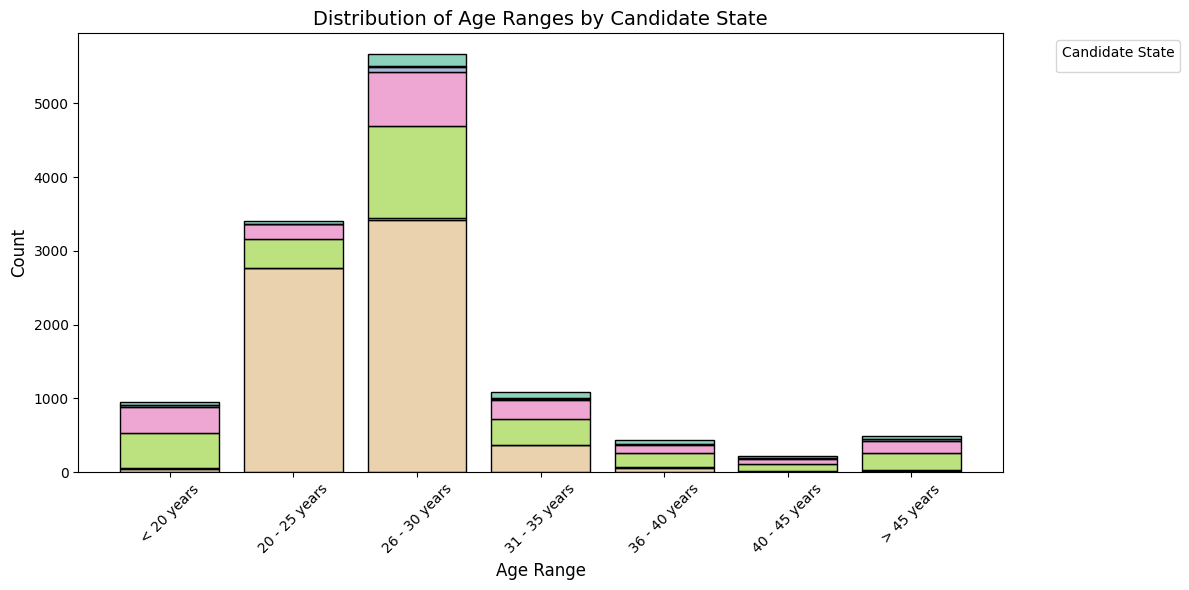

<ipython-input-210-b2f861d90bfc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


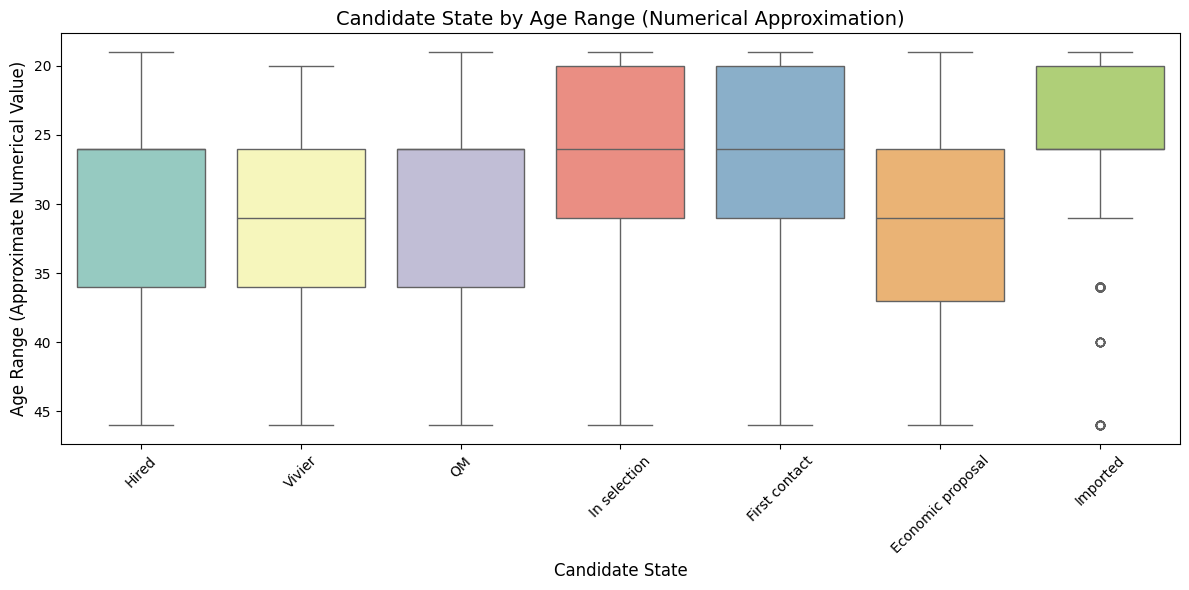

In [210]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data= df,
    x='Age Range',
    hue='Candidate State',
    multiple='stack',
    palette='Set2',
    shrink=0.8
)
plt.title("Distribution of Age Ranges by Candidate State", fontsize=14)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Candidate State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Candidate State',
    y=df['Age Range'].map(lambda x: int(x.split('-')[0]) if '-' in x else (19 if '<' in x else 46)),
    palette='Set3'
)
plt.title("Candidate State by Age Range (Numerical Approximation)", fontsize=14)
plt.xlabel("Candidate State", fontsize=12)
plt.ylabel("Age Range (Approximate Numerical Value)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
